# Fitting the RBC for Italy - Analysis of the Steady State

## Table of contents

* [Parameter Calibration](#chapter0_1)
* [Basic RBC model](#chapter0)
* [Impulse Response function](#chapter1)
* [Intruducing Capital Adjustment Costs](#chapter2)
* [New Impulse Response function](#chapter3)
* [Intruducing a Bond Market](#chapter4)
* [New New Impulse Response function](#chapter5)
* [Compare Steady States](#chapter6)

## Parameter calibration <a class="anchor" id="chapter0_1"></a>

Regarding our calibrated chosen parameters, we decided to follow several papers and reports that were made observing the Italian economy. To start, for the value of $\beta$, our discount factor, we used the calibrated value of 0,99. This value was presented around most of the literature read and, in the paper, made about the decline of Italy’s economy, by Daveri F. and Jona-Lasinio (2005). For our $\alpha$, we opted by following the OECD data on labour income share around the OECD countries, that provided us a value of 0,262. This $\alpha$, represents, our labor income share. We must also have in mind that a declining labour share can also have political consequences if it erodes support for market-oriented economic policies or for globalization more broadly (Greenwood et al., 2000). For the values of $\sigma_L$, given by 0,52, $\sigma_C$, given by 0,0068, $\rho_A$, given by 0,9405, and $\delta$, given by 0,1, we followed the recent paper made about the Real Business Cycle in Italy. This paper investigated the structural relation between the Italian weak macroeconomic performances and the productivity decline experienced over the last 15 years, estimating a Dynamic Stochastic General Equilibrium (DSGE) model, being, therefore, a good paper to consider (Mariano, 2016).

[1] Daveri, F., Jona-Lasinio, C., & Zollino, F. (2005). ITALY'S DECLINE: GETTING THE FACTS RIGHT [with DISCUSSION]. Giornale degli economisti e annali di economia, 365-421.

[2] Greenwood, J., Hercowitz, Z., & Krusell, P. (2000). The role of investment-specific technological change in the business cycle. European Economic Review, 44(1), 91-115

[3] Marino, F. (2016). The Italian productivity slowdown in a Real Business Cycle perspective. International Review of Economics, 63(2), 171-193

In [1]:
%run init_notebookspace.py
from settings import *

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\macro_rbc\data


In [2]:
%matplotlib inline
import gEconpy as ge
import gEconpy.plotting as gp

import matplotlib.pyplot as plt

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
def compare_steady_states(models, names):
    all_keys = set()
    for model in models:        all_keys = all_keys.union(set(list(model.steady_state_dict.keys())))
    
    header = ' ' * 10 + ''.join([f'{name:>10}' for name in names])
    print(header)
    print('-' * len(header))

    for key in all_keys:
        line = f'{key:<10}'
        for model in models:
            if key in model.steady_state_dict.keys():
                value = f'{model.steady_state_dict[key]:>10.3f}'
            else:
                value = f'{"---":>10}'
            line += value 
        print(line)

## Basic RBC model <a class="anchor" id="chapter0"></a>

In [4]:
rbc_base = ge.gEconModel(os.path.join(DATA_DIR, "rbc_basic.gnc"))

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	6 parameters
		 0 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [5]:
rbc_base.steady_state()
rbc_base.solve_model()

print('\nSteady State')
rbc_base.print_steady_state()

print('\nBlanchard Kahn Conditions')
rbc_base.check_bk_condition();

Steady state found! Sum of squared residuals is 4.2182281477579137e-19
Solution found, sum of squared residuals:  5.619368932851024e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000

Steady State
A_ss               1.000
C_ss               1.235
I_ss               0.185
K_ss              18.508
L_ss               0.571
Y_ss               1.420
lambda_ss          0.407
r_ss               0.020
w_ss               1.836

Blanchard Kahn Conditions
Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.


## Impulse Response function <a class="anchor" id="chapter1"></a>

Impulse response for K is rather sharp, this does not correspond to reality, which can be better approximated with capital adjustment cost.

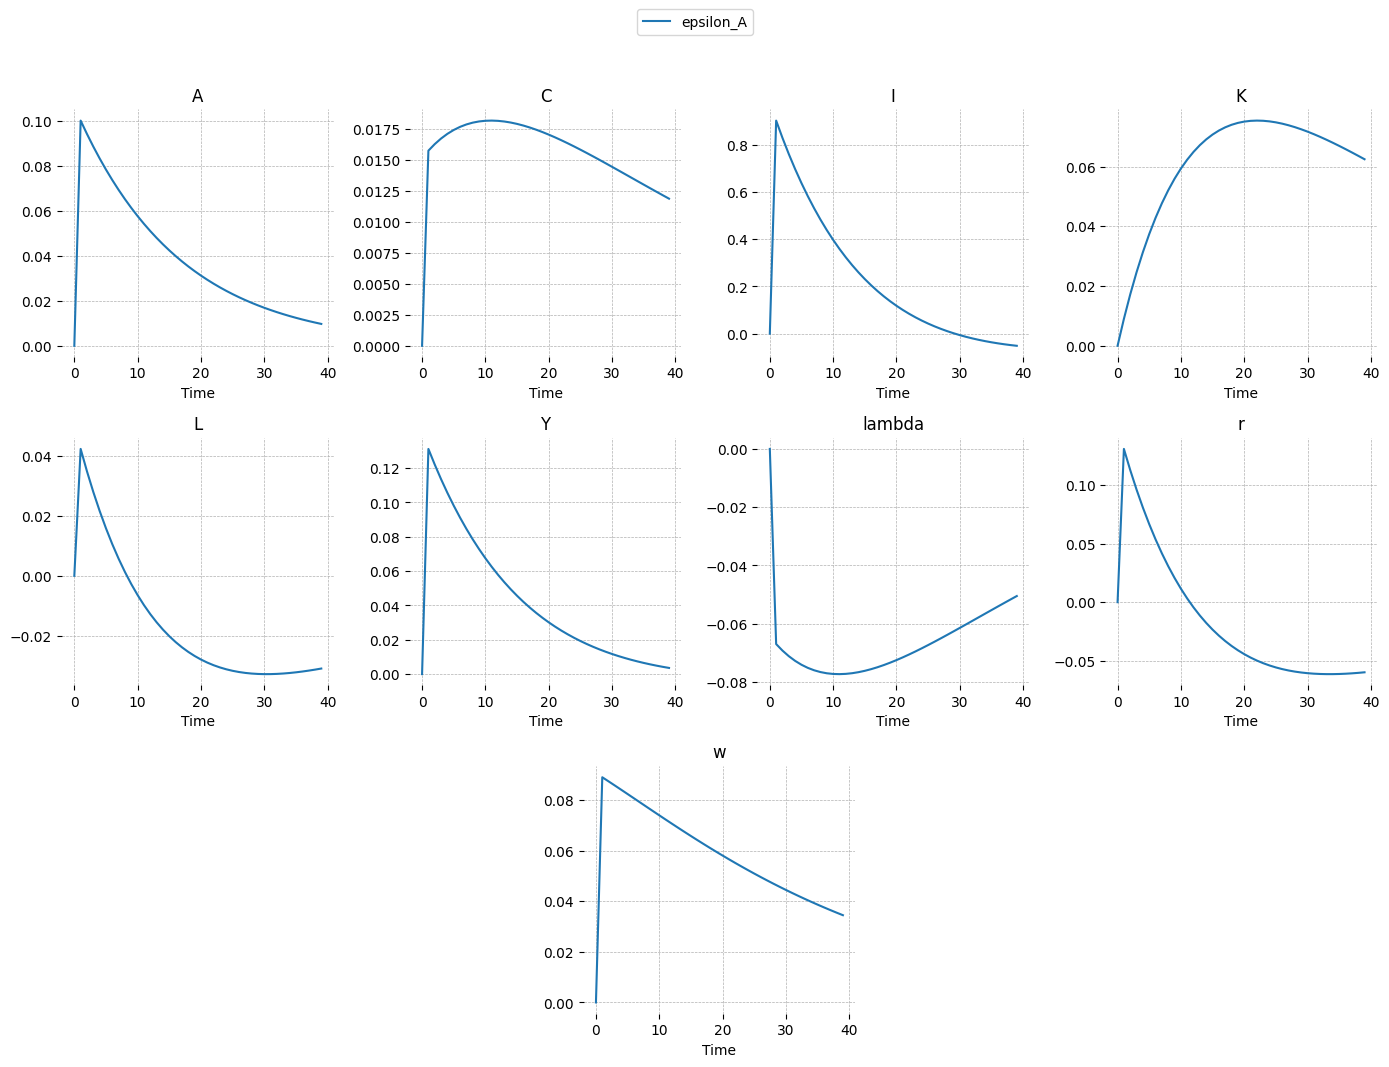

In [6]:
base_irf = rbc_base.impulse_response_function(simulation_length=40, shock_size=.1)
gp.plot_irf(base_irf, legend=True);

Why is the cov on I so high? Investment are the most volatile variable in economic model, and if we take the square root of the variance the s.d. is near 2.3 which seems reasonable. Moreover at the moment we haven't introduced any friction in our model.
We will do it in the next section

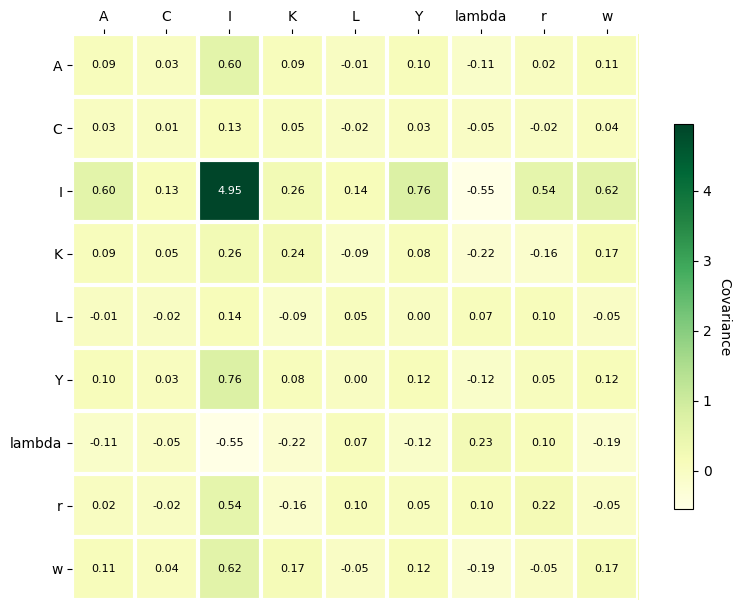

In [7]:
gp.plot_covariance_matrix(rbc_base.compute_stationary_covariance_matrix(), cbar_kw={'shrink': 0.5});

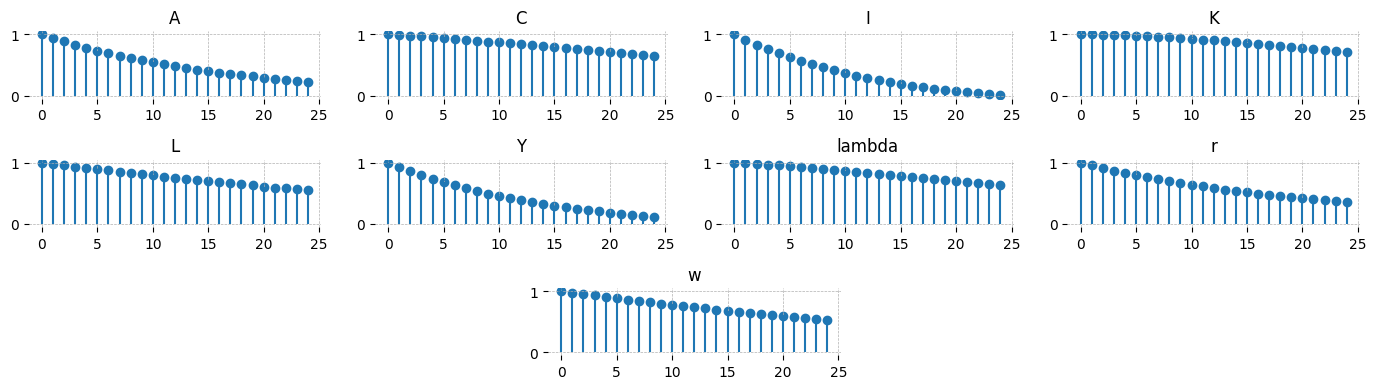

In [8]:
gp.plot_acf(rbc_base.compute_autocorrelation_matrix(n_lags=25));

##  Intruducing Capital Adjustment Cost <a class="anchor" id="chapter2"></a>

In [9]:
rbc_capadj = ge.gEconModel(os.path.join(DATA_DIR, "rbc_capadj.gnc"))

Model Building Complete.
Found:
	11 equations
	11 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	7 parameters
		 0 / 7 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [10]:
rbc_capadj.steady_state()
rbc_capadj.solve_model()
print('\nSteady State')
rbc_capadj.print_steady_state()

print('\n\nBlanchard Kahn Conditions')
rbc_capadj.check_bk_condition();

Steady state found! Sum of squared residuals is 7.407896938091064e-30
Solution found, sum of squared residuals:  4.448401792317777e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000

Steady State
A_ss               1.000
C_ss               1.235
I_ss               0.185
K_ss              18.508
L_ss               0.571
Q_ss               1.000
Y_ss               1.420
lambda_ss          0.407
q_ss               0.407
r_ss               0.020
w_ss               1.836


Blanchard Kahn Conditions
Model solution has 4 eigenvalues greater than one in modulus and 4 forward-looking variables.
Blanchard-Kahn condition is satisfied.


In [11]:
for eq in rbc_capadj.steady_state_system:
    display(eq)

-Q_ss + lambda_ss/q_ss

-C_ss - I_ss + K_ss*r_ss + L_ss*w_ss

-phi*K_ss*(-delta + I_ss/K_ss)**2/2 + I_ss + K_ss*(1 - delta) - K_ss

-lambda_ss + C_ss**(-sigma_C)

-L_ss**sigma_L + lambda_ss*w_ss

-lambda_ss - q_ss*(phi*(-delta + I_ss/K_ss) - 1)

beta*(lambda_ss*r_ss - q_ss*(delta - phi*I_ss*(-delta + I_ss/K_ss)/K_ss + phi*(-delta + I_ss/K_ss)**2/2 - 1)) - q_ss

A_ss*K_ss**alpha*L_ss**(1 - alpha) - Y_ss

alpha*A_ss*K_ss**(alpha - 1)*L_ss**(1 - alpha) - r_ss

A_ss*K_ss**alpha*(1 - alpha)/L_ss**alpha - w_ss

rho_A*log(A_ss) - log(A_ss)

##  New Impulse Response function <a class="anchor" id="chapter3"></a>

Capital adjustment shows the expected behaviour of a more hump-shaped adjustment to shocks in Y. Important to note is also the effect on C. With capital adjustment cost a higher share of the initial income is consumed, wherefore consumption deviates further from its steady state and its reversion is less sharp.

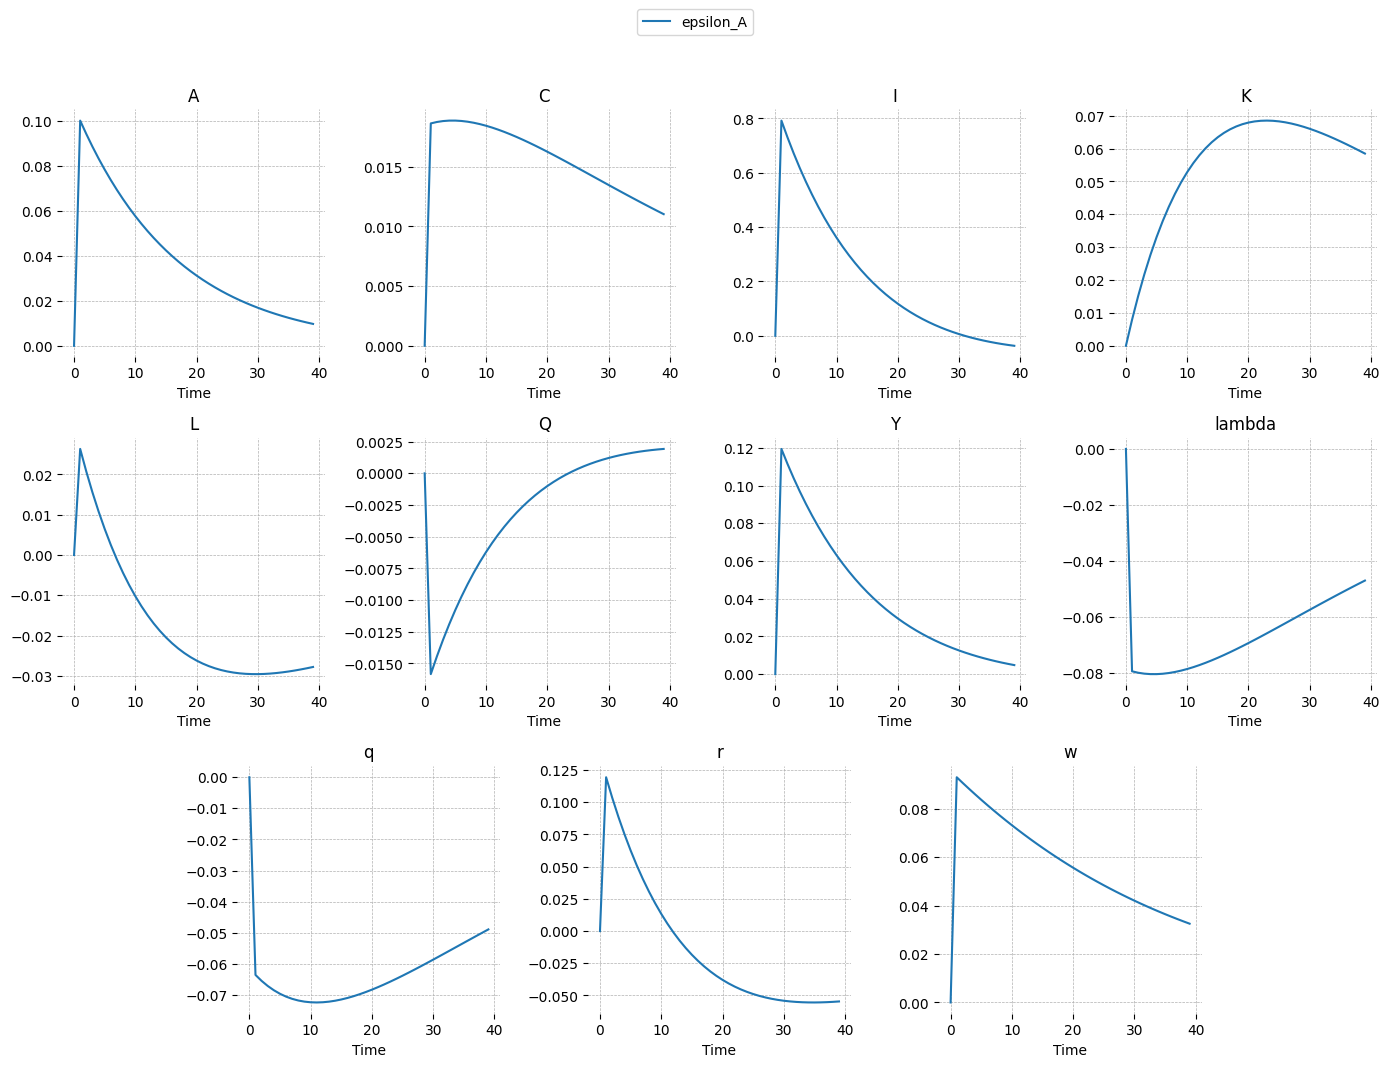

In [12]:
capajd_irf = rbc_capadj.impulse_response_function(simulation_length=40, shock_size=.1)
gp.plot_irf(capajd_irf, legend=True);

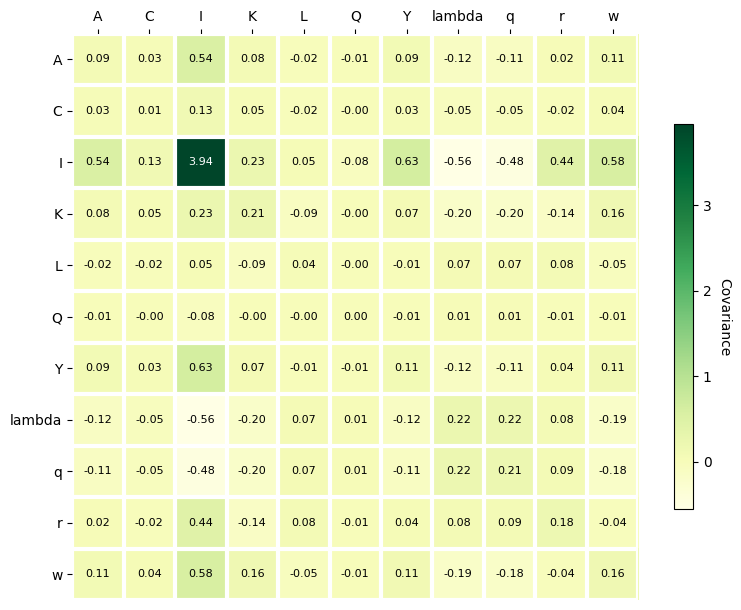

In [13]:
gp.plot_covariance_matrix(rbc_capadj.compute_stationary_covariance_matrix(), cbar_kw={'shrink': 0.5});

The hump shaped behaviour of K can also be seen in its autocorrelation function, as the reaction is smoothed out values are more highly correlated and tail off far slower than in the basic model. Capital adjusment costs, have a similar effect on consumption. As income is not directly put towards capital more is left for consumption, leading to a similarly smoothed out consumption pattern and thus higher autocorrelation with longer tail.

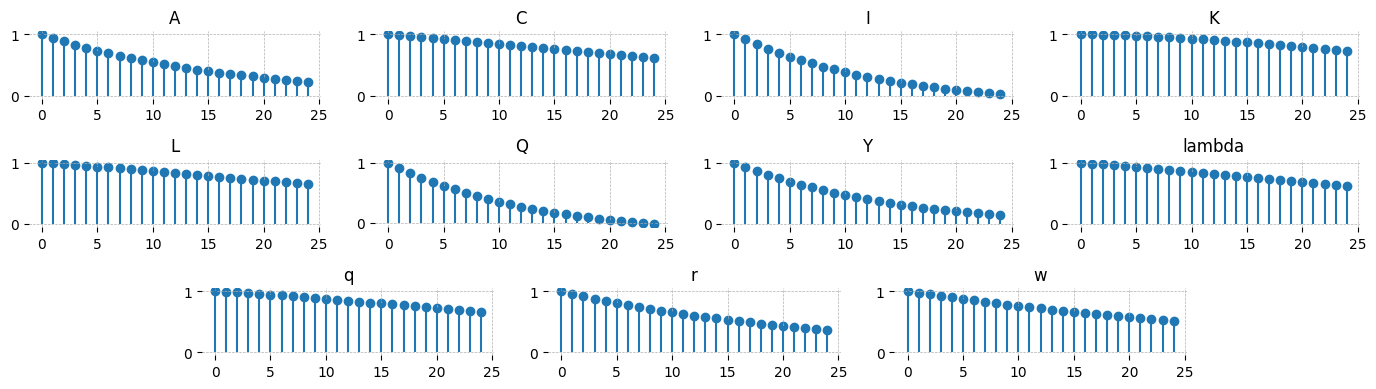

In [14]:
gp.plot_acf(rbc_capadj.compute_autocorrelation_matrix(n_lags=25));

## Intruducing a Bond Market <a class="anchor" id="chapter4"></a>

In [15]:
rbc_bonds = ge.gEconModel(os.path.join(DATA_DIR, "rbc_bonds.gnc"))

Model Building Complete.
Found:
	12 equations
	12 variables
	The following variables were eliminated at user request:
		U_t
	The following "variables" were defined as constants and have been substituted away:
		B_t,mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	7 parameters
		 2 / 7 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [16]:
rbc_bonds.steady_state()
rbc_bonds.solve_model(not_loglin_variable=['Div', 'TC'])
print('\nSteady State')
rbc_bonds.print_steady_state()

print('\n\nBlanchard Kahn Conditions')
rbc_bonds.check_bk_condition();

Steady state found! Sum of squared residuals is 1.2674159778023522e-29
Solution found, sum of squared residuals:  1.7671587979995448e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000

Steady State
A_ss               1.000
C_ss               1.410
Div_ss             0.000
I_ss               0.211
K_ss              21.131
L_ss               0.652
TC_ss             -1.621
Y_ss               1.621
lambda_ss          0.231
r_G_ss             1.010
r_ss               0.020
w_ss               1.836


Blanchard Kahn Conditions
Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.


In [17]:
for eq in rbc_bonds.steady_state_system:
    display(eq)

-C_ss + Div_ss - I_ss + K_ss*r_ss + L_ss*w_ss

I_ss + K_ss*(1 - delta) - K_ss

-lambda_ss + C_ss**(-sigma_C)

-L_ss**sigma_L + lambda_ss*w_ss

beta*(lambda_ss*r_ss - lambda_ss*(delta - 1)) - lambda_ss

beta*lambda_ss - lambda_ss/r_G_ss

-Div_ss + TC_ss + Y_ss

A_ss*K_ss**alpha*L_ss**(1 - alpha) - Y_ss

-K_ss*r_ss - L_ss*w_ss - TC_ss

alpha*A_ss*K_ss**(alpha - 1)*L_ss**(1 - alpha) - r_ss

A_ss*K_ss**alpha*(1 - alpha)/L_ss**alpha - w_ss

rho_A*log(A_ss) - log(A_ss)

##  New New Impulse Response function <a class="anchor" id="chapter5"></a>

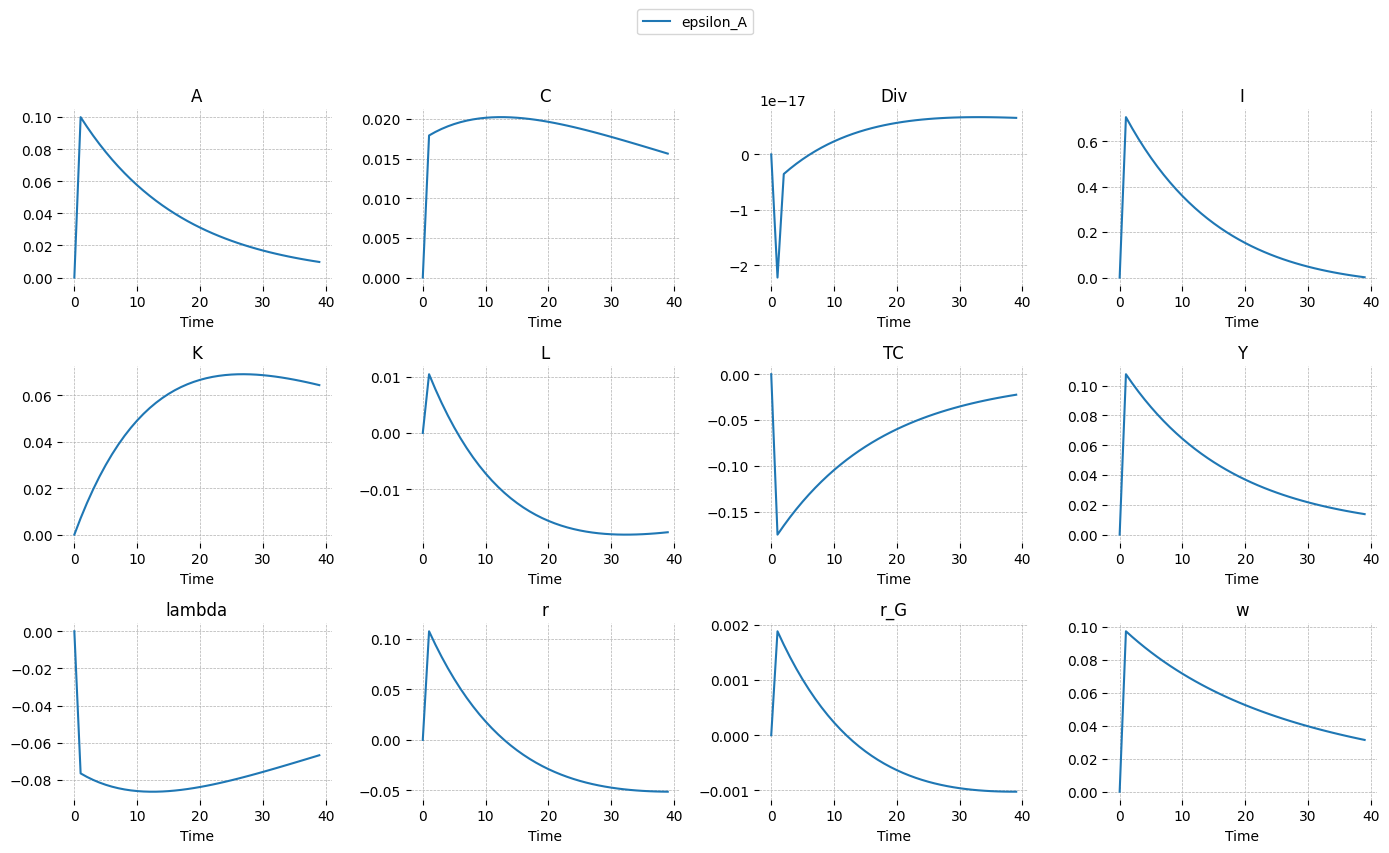

In [18]:
bonds_irf = rbc_bonds.impulse_response_function(simulation_length=40, shock_size=.1)
gp.plot_irf(bonds_irf, legend=True);

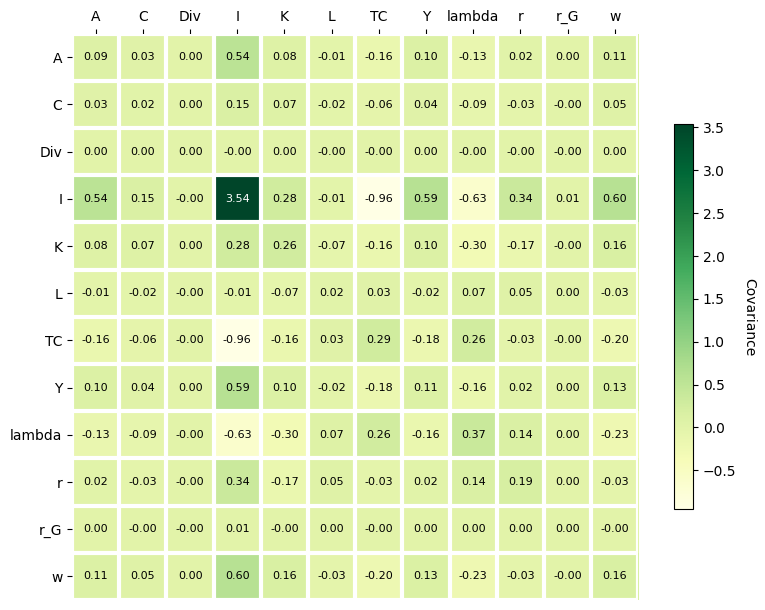

In [19]:
gp.plot_covariance_matrix(rbc_bonds.compute_stationary_covariance_matrix(), cbar_kw={'shrink': 0.5});

c:\users\lukasgrahl\documents\git\macro_rbc\env_macro_rbc\lib\site-packages\gEconpy\plotting\plotting.py:397: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


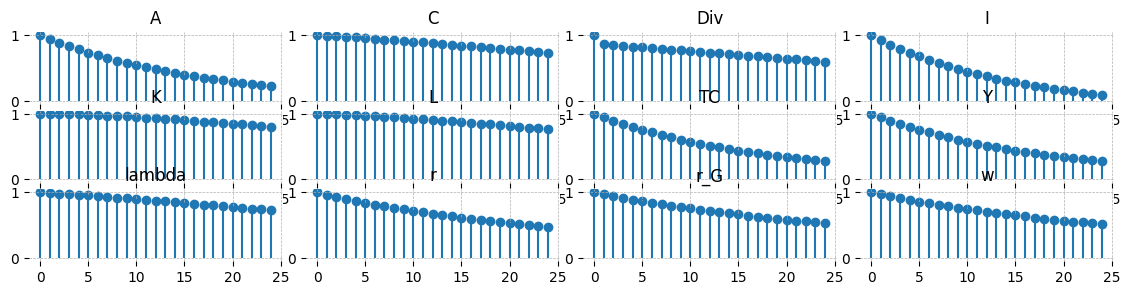

In [20]:
gp.plot_acf(rbc_bonds.compute_autocorrelation_matrix(n_lags=25));

## Compare Steady States <a class="anchor" id="chapter6"></a>

In [21]:
compare_steady_states([rbc_base, rbc_capadj, rbc_bonds], ['Baseline', 'K Adj', 'Bonds'])

            Baseline     K Adj     Bonds
----------------------------------------
w_ss           1.836     1.836     1.836
q_ss             ---     0.407       ---
r_G_ss           ---       ---     1.010
TC_ss            ---       ---    -1.621
C_ss           1.235     1.235     1.410
Div_ss           ---       ---     0.000
lambda_ss      0.407     0.407     0.231
L_ss           0.571     0.571     0.652
r_ss           0.020     0.020     0.020
I_ss           0.185     0.185     0.211
Q_ss             ---     1.000       ---
Y_ss           1.420     1.420     1.621
A_ss           1.000     1.000     1.000
K_ss          18.508    18.508    21.131
